# Generate yellow smiley faces 🙂

## load dependencies
* matplotlib for plotting
* numpy for array handling
* json for loading emoji description
* mpimg and glob for reading PNG
* tensorflow for GAN

In [54]:
%matplotlib inline

import pickle as pkl

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import json
import glob
import random
from pprint import pprint

## filter and load emoji files

In [22]:
# filter only person emojis without tones
with open('emojione-2.2.7/emoji.json') as data_file:
    emojis = json.load(data_file)

smileys = {k: v for k, v in emojis.items() if v["category"] == "people" and not "_tone" in k}
pprint("original dictionary:")
pprint({key: smileys[key] for key in list(smileys.keys())[:1]})

smileys = {k: {"keywords": v["keywords"], "unicode": v["unicode"], "ascii": v["aliases_ascii"], "name": v["name"]} for k,v in smileys.items()}
pprint("minimized dictionary: {} left out of {} emojis".format(len(smileys), len(emojis)))
pprint({key: smileys[key] for key in list(smileys.keys())[:2]})

'original dictionary:'
{'grinning': {'aliases': [],
              'aliases_ascii': [],
              'category': 'people',
              'code_decimal': '&#128512;',
              'emoji_order': '1',
              'keywords': ['happy', 'smiley', 'emotion'],
              'name': 'grinning face',
              'shortname': ':grinning:',
              'unicode': '1f600',
              'unicode_alt': ''}}
'minimized dictionary: 225 left out of 1820 emojis'
{'grin': {'ascii': [],
          'keywords': ['happy', 'silly', 'smiley', 'emotion', 'good', 'selfie'],
          'name': 'grinning face with smiling eyes',
          'unicode': '1f601'},
 'grinning': {'ascii': [],
              'keywords': ['happy', 'smiley', 'emotion'],
              'name': 'grinning face',
              'unicode': '1f600'}}


In [50]:
# filter all files for the given smiley unicodes
image_paths = glob.glob("./emojione-2.2.7/assets/png/*.png")
#pprint(image_paths[:10])
filtered_files = [v["unicode"] for k,v in smileys.items()]
filtered_files = [next(filter(lambda p: f+".png" in p, image_paths)) for f in filtered_files]

In [60]:
# load all files
images = [mpimg.imread(f) for f in filtered_files]

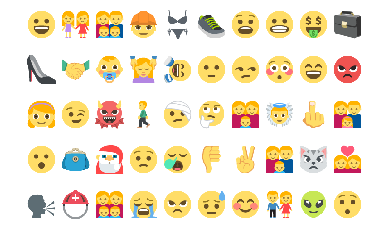

In [65]:
# display 20 random emojis
display_count = 50
f, axarr = plt.subplots(display_count//10, 10)
for (i, img) in enumerate(random.sample(images, display_count)):
    a = axarr[i%(display_count//10), i//(display_count//10)]
    a.imshow(img)
    a.axis("off")

## preprocessing functions

In [67]:
def scale(x, min_val=-1, max_val=1):
    # scale to (0, 1)
    x = ((x - x.min())/(255 - x.min()))
    
    # scale to feature_range
    x = x * (max_val - min_val) + min_val
    return x

In [117]:
def get_batches(images, batch_size, shuffle=True):
    images = np.array(images)
    if shuffle:
        idx = np.arange(len(images))
        np.random.shuffle(idx)
        images = images[idx]
    n_batches = len(images)//batch_size
    for i in range(0, len(images), batch_size):
        x = images[i:i+batch_size]
        yield x

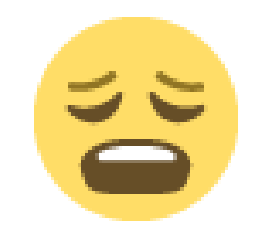

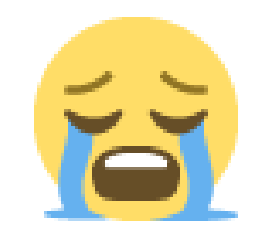

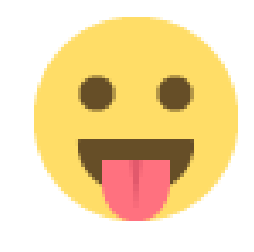

In [121]:
# test run batches generator..
it = get_batches(images, 10)
for i in range(3):
    n = next(it)
    plt.figure()
    plt.imshow(n[2])
    plt.axis("off")